# Aerosol-Ice Nucleating Particle Closure

Contributed by Yijia Sun and Daniel A. Knopf

---

## Overview
Clouds observed during the Cold-Air Outbreaks in the Marine Boundary Layer Experiment (COMBLE) are typically mixed-phase clouds where supercooled liquid droplets and ice crystals coexist. Ice-nucleating particles (INPs) from the ambient aerosol particle size distribution (PSD) can initiate ice crystal formation. The ability to predict INPs from ambient aerosol can be evaluated by conducting a so-called closure study as outlined in <a href="https://journals.ametsoc.org/view/journals/bams/102/10/BAMS-D-20-0151.1.xml"> Knopf et al. (2021)</a>. Different immersion freezing (IMF) parameterizations can be applied to derive the number concentration of predicted INPs for the COMBLE and Zeppelin observatory locations. Zeppelin is upwind and COMBLE downwind of the cold-air outbreak event.

The quickcalc module, based on the simplistic 1D aerosol-cloud model (Knopf et al., 2023), allows inputting the PSD information measured at COMBLE and Zeppelin locations to derive the number concentration of INPs for different immersion freezing parameterizations. These predicted INP number concentrations are then compared to locally measured INP number concentrations, thereby manifesting a closure exercise. 

For this initial closure exercise, we chose Zeppelin observations at 0 UTC March 13 and COMBLE observations at 18 UTC March 13. The ambient PSD measurements are applied to derive INP number concentrations under the assumption that all aerosol particles are sea spray aerosols (SSA) while halving the number concentration of particles in the accumulation mode and neglecting particles in the Aitken mode. For this closure exercise three different IMF parameterizations were evaluated: that include two parameterizations that are singular or deterministic (no time dependence and ice nucleates on special particles or sites) and one parameterization that is based on classical nucleation theory (CNT) where ice nucleation is treated stochastically, i.e., no special particles and nucleation proceeds randomly, and is time dependent: MC2018 (singular ice nucleation active sites-based parameterization of SSA, <a href="https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2017JD028033"> McCluskey et al., 2018</a>), AL2022 (singular ice nucleation active sites-based parameterization of SSA, <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9629709/"> Alpert et al., 2022</a>) and the water-activity based immersion freezing model (ABIFM) of SSA (CNT-based parameterization, <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9629709/"> Alpert et al., 2022</a>). Typically, these IMF parameterizations are uncertain by ±1-3 orders of magnitude. The results of this closure exercise can be seen <a href="https://drive.google.com/drive/folders/1j7x0LsrWGi4Q0P6wcjGHFhQwT6iqT4Dy?usp=sharing"> here</a>.

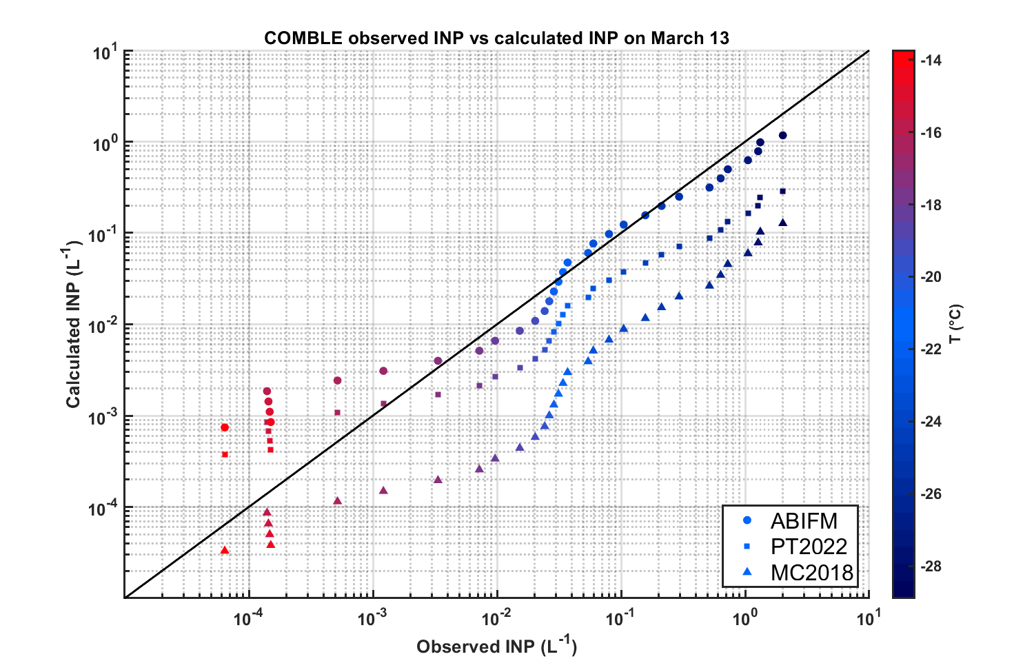

## Prerequisites
**System requirements**:
Implement numpy, xarray, pandas, pint and flake8 in the python environment and run this jupyter notebook in <a href="https://drive.google.com/drive/folders/1BtyeYiqLI6PwYwGPEGPPzlN_kvh2B8jO?usp=sharing"> this folder</a>. 

---

## Imports

In [1]:
from quickcalc import quickcalc
import numpy as np
from time import time
import xarray as xr
import pandas as pd

The applied aerosol PSD parameters for Zeppelin and COMBLE locations can be accessed in <a href="https://drive.google.com/drive/folders/1dDgSVGd8ruOcKBsEVoaZ7qHo5ywmp-E6?usp=sharing"> this folder</a>. 

In [2]:
aer_info1= {"name": "COMBLE18UTCMarch13",             #COMBLE18UTCMarch13case
                     "n_init_max": [21.66e6, 7.14e6],
                      "psd": {"type": "multi_logn",
                              "diam_mean": [0.13e-6,0.33e-6],
                              "geom_sd":[1.67,1.69],
                              "n_bins":50,
                              "diam_min":(0.0078e-6,5.577e-6),
                              "m_ratio":1.5},
                              "nucleus_type": "SSA"}

aer_info2= {"name": "ZEPPELIN0UTCMarch13",             #ZEPPELIN0UTCMarch13case
                     "n_init_max": [100.605e6, 24.58e6],
                      "psd": {"type": "multi_logn",
                              "diam_mean": [0.13e-6,0.61e-6],
                              "geom_sd":[2.2,1.9],
                              "n_bins":50,
                              "diam_min":(0.0059e-6,11.59e-6),
                              "m_ratio":1.5},
                              "nucleus_type": "SSA"}

## Calculate the predicted INPs
For the time-dependent IMF parameterization (ABIFM) an ice nucleation activation time, based on the INP measurements has to be applied. The chosen activation time is 1 min following the recommendation given in <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9629709/"> Alpert et al., (2022)</a>. The implemented equations for selected SSA IMF parameterizations can be found in the file <a href="https://drive.google.com/file/d/1c0-iEJtbTOWg8Vl7_G_Iu51-8suH6vbN/view?usp=sharing"> AER.py</a>. 

In [4]:
COMBLEAL2022INP=[]
COMBLEMC2018INP=[]
COMBLEABIFMINP=[]
ZeppelinAL2022INP=[]
ZeppelinMC2018INP=[]
ZeppelinABIFMINP=[]

for T in range(1, 48, 1):
        #COMBLE18UTCMarch13case
        COMBLEAL2022 = quickcalc(aer_info_dict={**aer_info1, **{"singular_fun": "AL2022"}}, T_in=243+(T-1)*0.5, use_ABIFM=False,RH_in=99.5)
        COMBLEAL2022INP.append(COMBLEAL2022.variables['inp_tot'].values)
        COMBLEMC2018 = quickcalc(aer_info_dict={**aer_info1, **{"singular_fun": "MC2018"}}, T_in=243+(T-1)*0.5, use_ABIFM=False,RH_in=99.5)
        COMBLEMC2018INP.append(COMBLEMC2018.variables['inp_tot'].values)
        COMBLEABIFM =quickcalc(aer_info_dict=aer_info1, T_in=243+(T-1)*0.5, use_ABIFM=True,RH_in=99.5, ABIFM_delta_t=60.)
        COMBLEABIFMINP.append(COMBLEABIFM.variables['inp_tot'].values)
        #ZEPPELIN0UTCMarch13case
        ZeppelinAL2022 = quickcalc(aer_info_dict={**aer_info2, **{"singular_fun": "AL2022"}}, T_in=243+(T-1)*0.5, use_ABIFM=False,RH_in=99.5)
        ZeppelinAL2022INP.append(ZeppelinAL2022.variables['inp_tot'].values)
        ZeppelinMC2018 = quickcalc(aer_info_dict={**aer_info2, **{"singular_fun": "MC2018"}}, T_in=243+(T-1)*0.5, use_ABIFM=False,RH_in=99.5)
        ZeppelinMC2018INP.append(ZeppelinMC2018.variables['inp_tot'].values)
        ZeppelinABIFM =quickcalc(aer_info_dict=aer_info2, T_in=243+(T-1)*0.5, use_ABIFM=True,RH_in=99.5, ABIFM_delta_t=60.)
        ZeppelinABIFMINP.append(ZeppelinABIFM.variables['inp_tot'].values)

## Variables Included in the netcdf Output File

In [6]:
COMBLEAL2022

<xarray.Dataset>
Dimensions:         (diam: 48, T: 16, diam_edge: 49)
Coordinates:
  * diam            (diam) float64 8.345e-09 9.553e-09 ... 4.183e-06 4.789e-06
  * T               (T) float64 266.0 266.1 266.2 266.3 ... 267.8 268.0 268.2
    T_C             (T) float64 -7.15 -7.05 -6.945 ... -5.379 -5.19 -4.992
    diam_um         (diam) float64 0.008345 0.009553 0.01094 ... 4.183 4.789
  * diam_edge       (diam_edge) float64 7.8e-09 8.929e-09 ... 5.123e-06
Data variables:
    dn_dlogD        (diam) float64 1.355 5.368 19.83 68.37 ... 20.21 6.005 1.67
    surf_area       (diam) float64 2.188e-16 2.867e-16 ... 5.498e-11 7.204e-11
    ns_raw          float64 2.251e+03
    inp_pct         float64 4.832e-08
    diam_bin_edges  (diam_edge) float64 7.8e-09 8.929e-09 ... 5.123e-06
    inp_tot         float64 0.01392
    inp             (diam, T) float64 3.274e-14 3.268e-14 ... 9.057e-08
    T_in            float64 266.0
Attributes:
    Parameterization:  INAS

## Export the Datasets of Predicted INPs

### Derived Closure Datasets as netcdf Files

In [ ]:
COMBLEAL2022.to_netcdf('SSAAL2022COMBLE18UTCMarch13.nc')
COMBLEMC2018.to_netcdf('SSAMC2018COMBLE18UTCMarch13.nc')
COMBLEABIFM.to_netcdf('SSAABIFMCOMBLE18UTCMarch13.nc')
ZeppelinAL2022.to_netcdf('SSAAL2022ZEPPELIN0UTCMarch13.nc')
ZeppelinMC2018.to_netcdf('SSAMC2018ZEPPELIN0UTCMarch13.nc')
ZeppelinABIFM.to_netcdf('SSAABIFMZEPPELIN0UTCMarch13.nc')

### Derived Closure Datasets as csv Files

In [ ]:
test=pd.DataFrame(data=COMBLEAL2022)
test.to_csv('SSAPT2022COMBLE18UTCMarch13.csv')
test=pd.DataFrame(data=COMBLEMC2018)
test.to_csv('SSAMC2018COMBLE18UTCMarch13.csv')
test=pd.DataFrame(data=COMBLEABIFM)
test.to_csv('SSAABIFMCOMBLE18UTCMarch13.csv')
test=pd.DataFrame(data=ZeppelinAL2022)
test.to_csv('SSAPT2022ZEPPELIN0UTCMarch13.csv')
test=pd.DataFrame(data=ZeppelinMC2018)
test.to_csv('SSAMC2018ZEPPELIN0UTCMarch13.csv')
test=pd.DataFrame(data=ZeppelinABIFM)
test.to_csv('SSAABIFMZEPPELIN0UTCMarch13.csv')

## Comparison of the Predicted INPs with Observed INPs
The observed INP number concentrations are given in a Google sheet <a href="https://docs.google.com/spreadsheets/d/1YgRghg8y4ZJVtSbtrRSNKJX_17Ppz1Xt/edit?usp=sharing&ouid=109128165079751861000&rtpof=true&sd=true"> (here)</a>. Provided <a href="https://drive.google.com/drive/folders/1dKneXq6Aa_-FSQtF-k9qJavn3wMzaSK5?usp=sharing"> matlab codes</a> named “COMBLE” and “ZEPPELIN” allow for quickly plotting the results.

---

## Summary
The aerosol-INP closure exercise at Zeppelin and COMBLE observatories is based on the assumption that all aerosol particles constitute sea spray aerosol (SSA) particles and their particle number concentration in the accumulation mode is halved and particles in the Aitken mode are neglected. In general, within the typically given uncertainties of applied IMF parameterizations, all approaches can represent observed INP number concentrations. However, there are differently achieved dgerees of closure among the INP representation:

At Zeppelin observatory, which is located in a mountainous region and is upwind compared to COMBLE, i.e., the boundary layer had less interaction with open ocean surfaces that potentially serve as a source of SSA and INPs, the singular MC2018 parameterizations represents observed INPs best.

At COMBLE, after the air masses travelled long distance over open ocean, the observed INP number concentrations are best represented by the SSA IMF parameterization ABIFM.


## Acknowledgment and References
- We thank Israel Silber who wrote the original version of the quickcalc module.
- A manuscript is currently in preparation (Sun et al., in prep). This manuscript further investigates the impacts of different types of aerosol properties, IMF parameterizations, and various model sensitivity parameters on the mixed-phase cloud processes.
- Knopf, D. A., Barry, K. R., Brubaker, T. A., Jahl, L. G., Jankowski, K. A. L., Li, J., Lu, Y., Monroe, L. W., Moore, K. A., Rivera-Adorno, F. A., Sauceda, K. A., Shi, Y., Tomlin, J. M.,  Vepuri, H. S. K., Wang, P., Lata, N. N., Levin, E. J. T., Creamean, J. M., Hill, T. C. J., China, S., Alpert, P. A., Moffet, R. C., Hiranuma, N., Sullivan, R. C., Fridlind, A. M., West, M., Riemer, N., Laskin, A., DeMott, P. J., Liu, X., Aerosol–Ice Formation Closure: A Southern Great Plains Field Campaign, B. Am. Meteorol. Soc., 102, 10, E1952–E1971, 2021, <a href="https://journals.ametsoc.org/view/journals/bams/102/10/BAMS-D-20-0151.1.xml"> doi: 10.1175/BAMS-D-20-0151.1</a>. 
- Knopf, D. A., Silber, I., Riemer, N., Fridlind, A. M., Ackerman, A. S., A 1D Model for Nucleation of Ice from Aerosol Particles: An Application to a Mixed-Phase Arctic Stratus Cloud Layer, Journal of Advances Modeling Earth Systems, 2023, under review.
- McCluskey, C. S., et al. (2018), Marine and Terrestrial Organic Ice-Nucleating Particles in Pristine Marine to Continentally Influenced Northeast Atlantic Air Masses, J. Geophys. Res.-Atmos., 123(11), 6196-6212, <a href="https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2017JD028033"> doi:10.1029/2017jd028033</a>.
- Alpert, P. A., W. P. Kilthau, R. E. O'Brien, R. C. Moffet, M. K. Gilles, B. Wang, A. Laskin, J. Y. Aller, and D. A. Knopf (2022), Ice-nucleating agents in sea spray aerosol identified and quantified with a holistic multimodal freezing model, Sci Adv, 8(44), eabq6842, <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9629709/"> doi:10.1126/sciadv.abq6842</a>.
- Contact: yijia.sun@stonybrook.edu 